In [11]:
%matplotlib inline
import matplotlib as mpl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import api_import 
import simplejson as json

In [2]:
yelp = pd.read_json("../data/yelp/yelp_api_data.json")
with open("../data/yelp/yelp_api_data.json") as fp:
    json1_str = fp.read() 
    yelp = json.loads(json1_str)
cuisine_types = yelp.keys()
with open("../data/yelp/cuisine_types_enabled.dat","w") as fp:
    fp.write("\n".join(cuisine_types))

In [3]:
cuisine_types

['puertorican',
 'cuban',
 'indpak',
 'mexican',
 'chinese',
 'peruvian',
 'vegetarian',
 'cafes',
 'ethiopian',
 'japanese',
 'greek',
 'arabian',
 'mideastern',
 'diners',
 'brazilian',
 'tradamerican',
 'korean',
 'newamerican',
 'latin',
 'italian']

In [7]:
food_dict = {"puertorico": "puertorican",
"puertorican": "puertorican",
"cuba": "cuban",
"cuban": "cuban",
"latin" : "latin",
"latino": "latin",
"mexican": "mexican",
"mex": "mexican",
"mexico": "mexican",
"chinese": "chinese",
"china": "chinese",
"veggie": "vegetarian",
"vegetarian": "vegetarian",
"indian": "indpak",
"india": "indpak",
"japan": "japanese",
"japanese": "japanese",
"greek": "greek",
"american": "tradamerican",
"modern": "newamerican",
"italy": "italian",
"italian": "italian"
}

In [5]:
food_dict

{'american': 'tradamerican',
 'china': 'chinese',
 'chinese': 'chinese',
 'cuba': 'cuban',
 'cuban': 'cuban',
 'greek': 'greek',
 'india': 'indpak',
 'indian': 'indpak',
 'italian': 'italian',
 'italy': 'italian',
 'japan': 'japanese',
 'japanese': 'japanese',
 'latin': 'latin',
 'latino': 'latin',
 'mex': 'mexican',
 'mexican': 'mexican',
 'mexico': 'mexican',
 'modern': 'newamerican',
 'puertorican': 'puertorican',
 'puertorico': 'puertorican',
 'vegetarian': 'vegetarian',
 'veggie': 'vegetarian'}

In [8]:
import string
with open("../app/static/dat/cuisine_types_enabled.dat") as fp:
    cuisine_types = fp.read()
cuisine_types = cuisine_types.split()
type(cuisine_types)
#cuisine_types = [string.capwords(x) for x in cuisine_types]
#cuisine_types = [x for x in cuisine_types]
#cuisine_types

list

In [9]:
with open("../data/yelp/cuisine_types_enabled.json","w") as fp:
    json.dump(food_dict,fp)

In [6]:
with open("../data/yelp/cuisine_types_enabled.json","r") as fp:
    cuisine_dict = json.load(fp)

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [65]:
#Load master dataframe
df = pd.read_json("../data/underserved_data.json")
df.head(3)
df.BOROUGH.str.lower()

10001    manhattan
10002    manhattan
10003    manhattan
10007    manhattan
10009    manhattan
10010    manhattan
10011    manhattan
10012    manhattan
10013    manhattan
10014    manhattan
10016    manhattan
10018    manhattan
10019    manhattan
10021    manhattan
10022    manhattan
10023    manhattan
10024    manhattan
10025    manhattan
10026    manhattan
10027    manhattan
10028    manhattan
10029    manhattan
10030    manhattan
10031    manhattan
10032    manhattan
10033    manhattan
10034    manhattan
10035    manhattan
10036    manhattan
10037    manhattan
           ...    
11379       queens
11385       queens
11411       queens
11412       queens
11413       queens
11414       queens
11415       queens
11416       queens
11417       queens
11418       queens
11419       queens
11420       queens
11421       queens
11422       queens
11423       queens
11424       queens
11426       queens
11427       queens
11428       queens
11429       queens
11430       queens
11432       

In [66]:
cuisine_type = "chinese"
deviation_linear = "dx_linear_"+cuisine_type
deviation_rf = "dx_rf_"+cuisine_type
feature_cuisine = "number_restaurants_"+cuisine_type
feature_cuisine_capita = "number_restaurants_capita_"+cuisine_type

In [67]:
df.sort(columns=feature_cuisine_capita, axis=0, 
        ascending=True, inplace=False, kind='quicksort', 
        na_position='last').head(20)[["pop_total",feature_cuisine,feature_cuisine_capita,"dx_linear_"+cuisine_type,"dx_rf_"+cuisine_type]]

,pop_total,number_restaurants_chinese,number_restaurants_capita_chinese,dx_linear_chinese,dx_rf_chinese
11451,0,0,0.000000,-0.095818,-0.266744
10069,26332,0,0.000000,-0.821126,-1.495331
11005,2055,0,0.000000,0.103951,-0.409830
11371,0,2,0.000000,0.130504,0.081850
10153,279,0,0.000000,-0.767061,-0.261059
10304,34699,0,0.000000,-0.789980,-1.447999
10301,24256,0,0.000000,-0.486163,-0.988733
10024,64742,2,0.250793,-1.369443,-1.122602
10457,61476,2,0.272504,-0.907658,-1.254046
11428,34882,1,0.286681,-0.225019,-1.314637


In [68]:
subdf = df.sort(columns=deviation_linear, axis=0, 
        ascending=True, inplace=False, kind='quicksort', 
        na_position='last').head(10)[["BOROUGH","pop_total",feature_cuisine,feature_cuisine_capita,"dx_linear_"+cuisine_type]]

In [69]:
zipcodes = [str(int(x)) for x in subdf.index.values.tolist()]

In [70]:
deviations = ["{0:<5.1f}".format(x).strip() for x in subdf["dx_linear_chinese"].tolist()]
dfsub = subdf

In [71]:
boroughs = dfsub.BOROUGH.tolist()
deviation = dfsub["dx_linear_"+cuisine_type]
deviations = ["{0:<5.1f}".format(x).strip() for x in subdf["dx_linear_"+cuisine_type].tolist()]
zipcodes = [str(int(x)) for x in subdf.index.values.tolist()]

In [72]:
zip(zipcodes,boroughs,deviations)

[('11377', u'Queens', '-3.8'),
 ('11373', u'Queens', '-3.4'),
 ('11219', u'Brooklyn', '-2.6'),
 ('11228', u'Brooklyn', '-2.6'),
 ('11364', u'Queens', '-2.5'),
 ('11358', u'Queens', '-1.9'),
 ('11230', u'Brooklyn', '-1.6'),
 ('11357', u'Queens', '-1.6'),
 ('10025', u'Manhattan', '-1.4'),
 ('10024', u'Manhattan', '-1.4')]

In [73]:
df.sort(columns=deviation_rf, axis=0, 
        ascending=True, inplace=False, kind='quicksort', 
        na_position='last').head(10)[["BOROUGH","pop_total",feature_cuisine,feature_cuisine_capita,"dx_linear_"+cuisine_type]]

,BOROUGH,pop_total,number_restaurants_chinese,number_restaurants_capita_chinese,dx_linear_chinese
11355,Queens,87015,97,7.353747,1.833313
11219,Brooklyn,89567,8,0.788489,-2.585620
11224,Brooklyn,34195,6,1.153976,-0.313322
10025,Manhattan,89286,5,0.445727,-1.420282
10069,Manhattan,26332,0,0.000000,-0.821126
10304,Staten,34699,0,0.000000,-0.789980
10271,Manhattan,7722,2,1.531109,-0.383635
11428,Queens,34882,1,0.286681,-0.225019
10457,Bronx,61476,2,0.272504,-0.907658
10024,Manhattan,64742,2,0.250793,-1.369443


In [74]:
print("R2_Linear = ",df["r2_linear_"+cuisine_type].unique()[0])
print("R2_RF = ",df["r2_rf_"+cuisine_type].unique()[0])
print("StdDev_Linear = ",df["stddev_linear_"+cuisine_type].unique()[0])
print("StdDev_RF = ",df["stddev_rf_"+cuisine_type].unique()[0])
for i in df.columns: print i

('R2_Linear = ', 0.65358147050000004)
('R2_RF = ', 0.93075901780000003)
('StdDev_Linear = ', 8.5080227135000008)
('StdDev_RF = ', 3.8009817748999999)
ALAND
ALAND_SQMI
AWATER
AWATER_SQMI
BOROUGH
FRAC_LAND
GEOID
INTPTLAT
INTPTLONG
LATMAX
LATMIN
LONGMAX
LONGMIN
STATE
STATE_ID
STATION
STATION_DISTANCE
USPS
average_rating_restaurants_arabian
average_rating_restaurants_brazilian
average_rating_restaurants_cafes
average_rating_restaurants_chinese
average_rating_restaurants_colombian
average_rating_restaurants_cuban
average_rating_restaurants_diners
average_rating_restaurants_ethiopian
average_rating_restaurants_french
average_rating_restaurants_greek
average_rating_restaurants_indpak
average_rating_restaurants_italian
average_rating_restaurants_japanese
average_rating_restaurants_korean
average_rating_restaurants_latin
average_rating_restaurants_mexican
average_rating_restaurants_mideastern
average_rating_restaurants_newamerican
average_rating_restaurants_peruvian
average_rating_restaurants_p

In [75]:
df.head(5)

,ALAND,ALAND_SQMI,AWATER,AWATER_SQMI,BOROUGH,FRAC_LAND,GEOID,INTPTLAT,INTPTLONG,LATMAX,...,unweighed_average_rating_restaurants_puertorican,unweighed_average_rating_restaurants_seafood,unweighed_average_rating_restaurants_soup,unweighed_average_rating_restaurants_spanish,unweighed_average_rating_restaurants_tradamerican,unweighed_average_rating_restaurants_turkish,unweighed_average_rating_restaurants_vegan,unweighed_average_rating_restaurants_vegetarian,zillow_house_index,zillow_house_median
10001,346238,0.133,0,0.000,Manhattan,1.000000,72122017100,40.747402,-73.990328,81.498550,...,NaN,3.333333,6.25,NaN,6.671429,NaN,8.250000,8.250000,0,0
10002,2063151,0.797,1249217,0.482,Manhattan,0.622863,468793019212,40.715444,-73.984217,529.328659,...,NaN,10.583333,5.00,9.250000,22.375000,NaN,14.833333,8.000000,0,0
10003,1097625,0.424,0,0.000,Manhattan,1.000000,288488038102,40.730343,-73.989634,325.855934,...,NaN,18.812500,11.50,7.833333,28.351190,4.0,17.166667,26.233333,0,0
10007,312722,0.121,0,0.000,Manhattan,1.000000,36061001300,40.709109,-74.012980,40.711627,...,NaN,4.000000,NaN,NaN,3.500000,NaN,NaN,4.000000,0,0
10009,1625274,0.627,1072262,0.414,Manhattan,0.602503,360610028607,40.724099,-73.977759,407.262230,...,17,7.000000,4.50,20.000000,15.157143,2.5,8.166667,15.250000,0,0


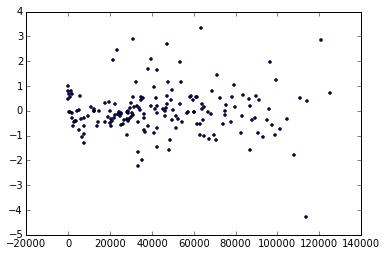

In [84]:
plt.scatter(df['pop_total'],df['dx_linear_all']-df['dx_linear_chinese'],s=6)

In [85]:
x = df['dx_linear_all']-df['dx_linear_chinese']

11220   -4.284334
10023   -2.220732
10038   -1.968725
11385   -1.774175
11217   -1.660747
11201   -1.589047
11355   -1.570769
11419   -1.448971
10018   -1.287008
11210   -1.173326
11435   -1.170978
10032   -1.148001
10199   -1.070479
10312   -1.061537
10459   -1.006421
11209   -0.974830
11414   -0.972963
10128   -0.968932
11208   -0.961256
11004   -0.953204
11221   -0.913989
11216   -0.905416
11214   -0.880407
10065   -0.839607
11379   -0.776810
11109   -0.755416
11235   -0.719441
11213   -0.690080
11418   -0.675157
10308   -0.625706
           ...   
11421    0.601118
10473    0.601941
10001    0.611855
10456    0.642822
10110    0.659593
10174    0.678802
11226    0.719919
10472    0.782085
10119    0.787347
11371    0.788551
11357    0.829019
11103    0.956611
10177    0.984585
11238    1.057536
11361    1.153422
10011    1.164207
11228    1.180230
10462    1.244276
10002    1.452796
11358    1.649484
11364    1.673556
11373    1.961641
10016    1.981020
10013    2.042707
10014    2